# **Digit Recognizer**
# **Assignment 6**

In [1]:
# Helper libraries
import numpy as np
import pandas as pd
from time import time
from collections import Counter

import os
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

#Ignores Warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
os.getcwd()
%cd /content/gdrive/My Drive/Colab Notebooks/ML_Assignment6/
!pwd
!ls
print('Working Directory')
print(os.getcwd())
work_dir = "/content/gdrive/My Drive/Colab Notebooks/ML_Assignment6/"

/content/gdrive/My Drive/Colab Notebooks/ML_Assignment6
/content/gdrive/My Drive/Colab Notebooks/ML_Assignment6
Assignment6.ipynb	  assignment6_randomforest.csv	test.csv
assignment6_KCluster.csv  assignment6_RFC_PCA.csv	train.csv
Working Directory
/content/gdrive/My Drive/Colab Notebooks/ML_Assignment6


In [5]:
#Reading Data into data frame
train = pd.read_csv(work_dir +'train.csv')
test = pd.read_csv(work_dir +'test.csv')
print(train)
train_raw_copy = train.copy()
test_raw_copy = test.copy()

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
41995      0       0       0       0  ...         0         0         0         0
41996      1       0       0       0  ...         0         0         0         0
41997      7       0       0       0  ...         0         0         0         0
41998      6       0       0       0  ...         0         0         0         0
41999      9       0       0       0  ...         0         0         0         0

[42000 rows x 7

## 1. **Fit a random forest classifier using the full set of explanatory variables and the model training set (csv).**

In [6]:
target = train['label']

# Drop the label feature
train.drop("label",axis=1,inplace=True)

In [7]:
X = train.iloc[:,0:].values / 255     #dividing by 255, or total number of pixels
y = target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

from datetime import datetime
start = datetime.now()
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
end = datetime.now()
print("Elapsed Time: ", end - start)
RFC_Elapsed_Time = end - start

from sklearn import metrics
print()
print("Accuracy of the model for the training dataset: ", metrics.accuracy_score(y_test,y_pred))

# target_test = test['label']
# test.drop("label",axis=1,inplace=True)
test_dataset_pred = rfc.predict(test)


#Submission for Kaggle 
header = ['ImageId','Label']

print(test_dataset_pred)

ImageIds = []
for i in range(len(test_dataset_pred)):
    #ImageIds.append([i+1,test_dataset_pred[i]])
    ImageIds.append(i+1)

output = pd.DataFrame({'ImageId': ImageIds,'Label': test_dataset_pred})
print(output)

output.to_csv("assignment6_randomforest.csv", index=False)


Elapsed Time:  0:00:35.073688

Accuracy of the model for the training dataset:  0.9628571428571429
[2 0 9 ... 3 9 2]
       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      9
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


# **2. Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the explanatory variables.**

In [8]:
#Standardizing Training Values
X = train.values
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
#cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [9]:
#PCA Analysis
X = train.values
X_std = StandardScaler().fit_transform(X)

mean_vec=np.mean(X_std,axis=0)
cov_mat=np.cov(X_std.T)
eigvalues ,eigvectors =np.linalg.eig(cov_mat)

eigpairs=[(np.abs(eigvalues[i]),eigvectors[:,i] )for i in range(len(eigvalues))]


eigpairs.sort(key=lambda x:x[0],reverse=True)
   
tot=sum(eigvalues)
var_exp=[(i/tot)*100 for i in sorted(eigvalues,reverse=True)]
cum_var_exp=np.cumsum(var_exp)

In [10]:
trace1 = go.Scatter(
    x=list(range(784)),
    y= cum_var_exp,
    mode='lines+markers',
    name="'Cumulative Explained Variance'",
   
    line = dict(
        shape='spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
    x=list(range(784)),
    y= var_exp,
    mode='lines+markers',
    name="'Individual Explained Variance'",
 
     line = dict(
        shape='linear',
        color = 'black'
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.5}],
                          print_grid=True)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,1)


fig.layout.title='explained Variance plots'
fig.layout.xaxis=dict(range=[0,800],title='Feature columns')
fig.layout.yaxis=dict(range=[0,100],title='explained variance')


py.iplot(fig,filename='inset example')


This is the format of your plot grid:
[ (1,1) x,y ]

With insets:
[ x2,y2 ] over [ (1,1) x,y ]



In [11]:
start = datetime.now()
pca=PCA(30)
pca.fit(X_std)
end = datetime.now()
print("Elapsed Time to find Principal Components: ", end - start)
Time_to_find_PCs = end - start

Elapsed Time to find Principal Components:  0:00:04.748082


In [12]:
X_pca=pca.transform(X_std)

In [13]:
X_pca.shape

(42000, 30)

In [14]:
X_std.shape

(42000, 784)

In [15]:
eigenvectors=pca.components_
eigenvectors.shape

(30, 784)

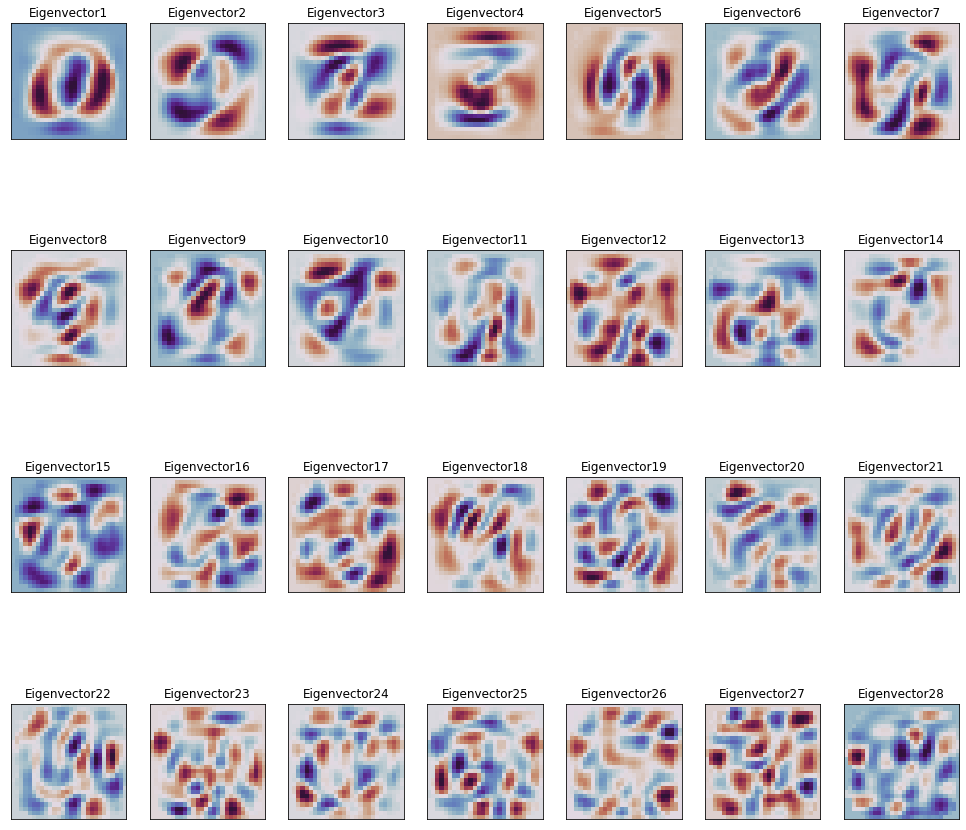

In [16]:
#Plotting the Eigenvector
plt.figure(figsize=(17,16))

x_row=4
y_col=7

for i in list(range(x_row*y_col)):
    
    plt.subplot(x_row,y_col,i+1)
    plt.imshow(eigenvectors[i].reshape(28,28),cmap='twilight_shifted')
    title_='Eigenvector'+str(i+1)
    plt.title(title_)
    plt.xticks(())
    plt.yticks(())
plt.show()    

<function matplotlib.pyplot.tight_layout>

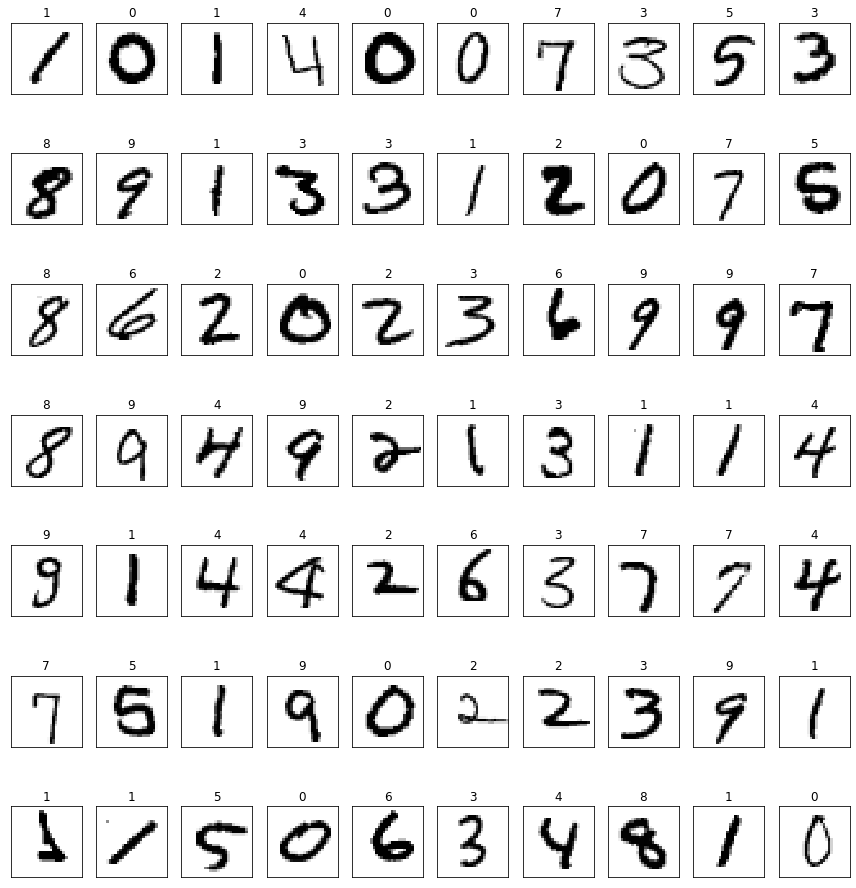

In [17]:
#Plotting MNIST data
plt.figure(figsize=(12,13))

for i in list(range(0,70)):
    plt.subplot(7,10,i+1)
    plt.title(target[i])
    plt.imshow(train.iloc[i].values.reshape(28,28), interpolation = "none", cmap='binary')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
               
plt.tight_layout

In [18]:
#Standardizing Data and Implementing PCA
X_=train
X_std_=StandardScaler().fit_transform(X_)
pca_=PCA(140)
X_140d=pca_.fit_transform(X_std_)
Target=target

In [19]:
Target.dtype

dtype('int64')

In [20]:
print(X_140d.shape)

(42000, 140)


In [21]:
eigenvectors_=pca_.components_
print(eigenvectors_.shape)

(140, 784)


In [22]:
print(pca_.components_)

[[-2.57977749e-17  1.12471138e-17  6.49787419e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.06445264e-17  1.56848476e-17  8.78406795e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-6.05525487e-17  4.69405192e-18 -6.99564554e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [-1.30910776e-17 -5.46070641e-17  2.12814403e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.91349878e-17  1.63853539e-18 -3.26280489e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.26043929e-17  3.58431279e-17 -9.20152876e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]


In [23]:
#Visualization of PCA Representations
trace = go.Scatter(
    x = X_140d[:,0],
    y = X_140d[:,1],
    name = str(Target),
    
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        
        opacity = 0.8
    )
)

data=[trace]

layout=go.Layout(title='PCA',
                hovermode='closest',
                xaxis=dict(
                    title='First principal direction',
                    ticklen=5,
                    zeroline=False),
                 yaxis=dict(
                 title='Second principal direction',
                 ticklen=5
            ),
                 showlegend=True
                
                    
                )
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='pca')

In [24]:
#Combined Data Sets
combined = train.append(test)
#I believe this is the flaw in the model given that the test dataset has no labels, we have no way to train using that dataset. 

# **3.Using the identified principal components from step (2), use thecsvto build another random forest classifier.**

In [25]:
#Random Forest Using PCA data
X = X_pca / 30     #dividing by 30, or total number of principal components 
y = target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

from datetime import datetime
start = datetime.now()
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
end = datetime.now()
print("Elapsed Time: ", end - start)
RFC_with_PCA_ElapsedTime = end - start

from sklearn import metrics
print()
print("Accuracy of the model for the training dataset with PCA: ", metrics.accuracy_score(y_test,y_pred))

##
X = test.values
X_std = StandardScaler().fit_transform(X)
X_pca=pca.transform(X_std)

Elapsed Time:  0:00:23.323237

Accuracy of the model for the training dataset with PCA:  0.930952380952381


In [26]:
test_dataset_pred = rfc.predict(X_pca)

In [27]:
X_pca.shape

(28000, 30)

In [28]:
#Submission for Kaggle 
header = ['ImageId','Label']

print(test_dataset_pred)

ImageIds = []
for i in range(len(X_pca)):
    ImageIds.append(i+1)

output = pd.DataFrame({'ImageId': ImageIds,'Label': test_dataset_pred})
print(output)

output.to_csv("assignment6_RFC_PCA.csv", index=False)

[2 0 9 ... 3 9 2]
       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      7
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


# **4. Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels.**

In [29]:
kmeans=KMeans(10)
X_clustered=kmeans.fit_predict(X_140d)

In [30]:
tracekmeans = go.Scatter(x=X_140d[:, 0], y= X_140d[:, 1], mode="markers",
                    showlegend=False,
                    marker=dict(
                            size=8,
                            color = X_clustered,
                            colorscale = 'Portland',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))


layout=go.Layout(title='Kmeans clustering',
                 hovermode='closest',
                 xaxis=dict(title='first principal direction',
                           ticklen=5,
                           zeroline=False,
                           gridwidth=2),
                 yaxis=dict(title='second principal component',
                           ticklen=5,
                           gridwidth=2),
                 showlegend=True
                     )

data = [tracekmeans]
fig1 = dict(data=data, layout= layout)
py.iplot(fig1, filename="svm")

In [31]:
x_clusters_df=pd.DataFrame(X_clustered, dtype=int)
x_clusters_df.columns=['Cluster']
targeted_df=pd.DataFrame(Target,dtype=int)

In [32]:
pd.crosstab(targeted_df.label, x_clusters_df.Cluster)

Cluster,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,211,3,860,594,63,3,2183,4,195,16
1,99,4,12,2,9,1,0,0,10,4547
2,36,15,451,1095,1376,99,14,22,582,487
3,68,45,2463,708,455,115,6,70,64,357
4,620,363,3,17,49,2396,34,188,76,326
5,1560,43,1335,132,156,164,18,37,62,288
6,64,1,72,18,221,17,188,4,3217,335
7,115,2457,9,9,9,924,10,549,3,316
8,1204,81,1617,64,112,202,24,39,16,704


In [33]:
X_clustered=kmeans.fit_predict(X_pca)
print(X_clustered)

#Submission for Kaggle 
header = ['ImageId','Label']

# targeted_df_labels = targeted_df['label']
ImageIds = []
for i in range(len(X_clustered)):
    ImageIds.append(i+1)

output = pd.DataFrame({'ImageId': ImageIds ,'Label': X_clustered})
print(output)

output.to_csv("assignment6_KCluster.csv", index=False)

[9 3 2 ... 7 4 9]
       ImageId  Label
0            1      9
1            2      3
2            3      2
3            4      2
4            5      1
...        ...    ...
27995    27996      4
27996    27997      4
27997    27998      7
27998    27999      4
27999    28000      9

[28000 rows x 2 columns]


# **5. The experiment we have proposed has a major design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen, and submit this to Kaggle.com.**

In [34]:
#Combined Data Sets
combined = train.append(test)
#I believe this is the flaw in the model given that the test dataset has no labels, we have no way to train using that dataset. 

# **6. Report Total Elapsed Time Measures for the training set analysis**

In [35]:
print(RFC_Elapsed_Time)
print(RFC_with_PCA_ElapsedTime )
print(Time_to_find_PCs)

0:00:35.073688
0:00:23.323237
0:00:04.748082
